In [77]:
import numpy as np
import seaborn as sns 
import pandas as pd
from tqdm import tqdm
import cv2
from tensorflow.keras.applications import Xception
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [78]:
TRAIN_PATH = '../Steel Defect Detection Dataset'
TRAIN_IMAGES = '../Steel Defect Detection Dataset/train_images'
TEST_IMAGES = '../Steel Defect Detection Dataset/train_images'

In [79]:
df_train = pd.read_csv(TRAIN_PATH + '/train.csv')
df_submission = pd.read_csv(TRAIN_PATH + '/sample_submission.csv')

In [80]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [81]:
df_train.shape

(7095, 3)

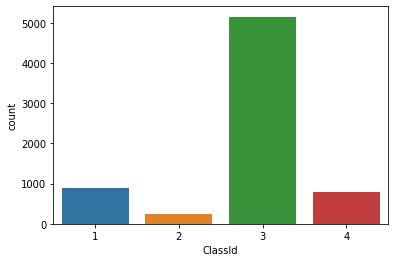

In [82]:
sns.countplot(x= df_train['ClassId'])
plt.show()

In [83]:
img = cv2.imread(TRAIN_IMAGES + '/0002cc93b.jpg')

In [84]:
img

array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 48,  48,  48],
        [ 50,  50,  50]],

       [[ 66,  66,  66],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 51,  51,  51]],

       [[ 61,  61,  61],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 49,  49,  49],
        [ 51,  51,  51],
        [ 54,  54,  54]],

       ...,

       [[155, 155, 155],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 51,  51,  51],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       [[160, 160, 160],
        [111, 111, 111],
        [100, 100, 100],
        ...,
        [ 55,  55,  55],
        [ 54,  54,  54],
        [ 48,  48,  48]],

       [[155, 155, 155],
        [114, 114, 114],
        [ 98,  98,  98],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 50,  50,  50]]

In [85]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [86]:
len(df_train)

7095

In [87]:
from imutils import paths

In [88]:
for random_image in paths.list_images(TRAIN_IMAGES + '{0002cc93b.jpg}'):
    print(random_image)
    plt.imshow(random_image)
    plt.show()

The class ID for this image is: 1


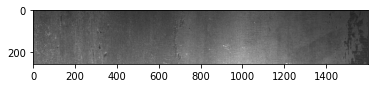

The class ID for this image is: 3


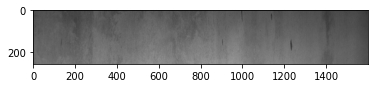

The class ID for this image is: 1


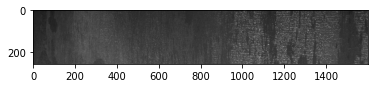

The class ID for this image is: 4


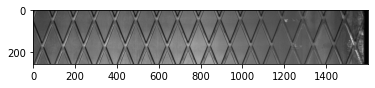

The class ID for this image is: 3


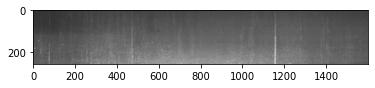

The class ID for this image is: 3


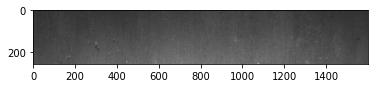

The class ID for this image is: 4


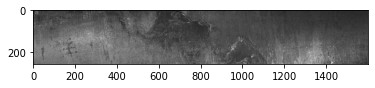

The class ID for this image is: 4


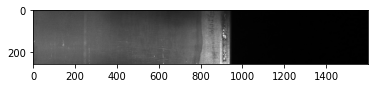

The class ID for this image is: 1


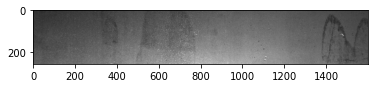

In [89]:
count = 0 
for image_path in paths.list_images(TRAIN_IMAGES):
    print("The class ID for this image is: {}".format(df_train['ClassId'].iloc[count]))
    count = count + 1
    random_image = plt.imread(image_path)
    plt.imshow(random_image)
    plt.show()
    if count == 9:
        break
        

In [90]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [00:50<00:00, 140.38it/s]


In [91]:
from sklearn.preprocessing import LabelBinarizer

In [92]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [93]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [94]:
images[0]

array([[[0.25882354, 0.25882354, 0.25882354],
        [0.46666667, 0.46666667, 0.46666667],
        [0.23137255, 0.23137255, 0.23137255],
        ...,
        [0.18431373, 0.18431373, 0.18431373],
        [0.21568628, 0.21568628, 0.21568628],
        [0.2       , 0.2       , 0.2       ]],

       [[0.25882354, 0.25882354, 0.25882354],
        [0.30588236, 0.30588236, 0.30588236],
        [0.24705882, 0.24705882, 0.24705882],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.22352941, 0.22352941, 0.22352941],
        [0.19215687, 0.19215687, 0.19215687]],

       [[0.24705882, 0.24705882, 0.24705882],
        [0.24313726, 0.24313726, 0.24313726],
        [0.23529412, 0.23529412, 0.23529412],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.21960784, 0.21960784, 0.21960784],
        [0.19215687, 0.19215687, 0.19215687]],

       ...,

       [[0.49411765, 0.49411765, 0.49411765],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.44313726, 0

In [95]:
classID[0]

array([1, 0, 0, 0])

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [98]:
len(X_train)

5676

In [99]:
len(X_cv)

1419

In [100]:
type(X_train)

numpy.ndarray

In [101]:
lb.classes_

array([1., 2., 3., 4.], dtype=float32)

In [102]:
from tensorflow.keras.applications import Xception, VGG19, ResNet152, InceptionV3
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras import Model 
from tensorflow.keras.optimizers import Adam

In [103]:
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [104]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [105]:
final_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [106]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [107]:
MODEL_SAVE_PATH = "Models/"

In [108]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [109]:
fitted_model = final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv),
                               callbacks = checkpoint, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 18s 198ms/step - loss: 0.8008 - accuracy: 0.7202 - val_loss: 0.7341 - val_accuracy: 0.7280
Epoch 2/10
89/89 [==============================] - 18s 203ms/step - loss: 0.6927 - accuracy: 0.7345 - val_loss: 0.6259 - val_accuracy: 0.7463
Epoch 3/10
89/89 [==============================] - 18s 205ms/step - loss: 0.6500 - accuracy: 0.7415 - val_loss: 0.5944 - val_accuracy: 0.7505
Epoch 4/10
89/89 [==============================] - 18s 203ms/step - loss: 0.6213 - accuracy: 0.7518 - val_loss: 0.5778 - val_accuracy: 0.7569
Epoch 5/10
89/89 [==============================] - 18s 207ms/step - loss: 0.5979 - accuracy: 0.7563 - val_loss: 0.5497 - val_accuracy: 0.7703
Epoch 6/10
89/89 [==============================] - 19s 210ms/step - loss: 0.5817 - accuracy: 0.7671 - val_loss: 0.5781 - val_accuracy: 0.7505
Epoch 7/10
89/89 [==============================] - 19s 215ms/step - loss: 0.5780 - accuracy: 0.7671 - val_loss: 0.5319 - val_accuracy: 0.7879

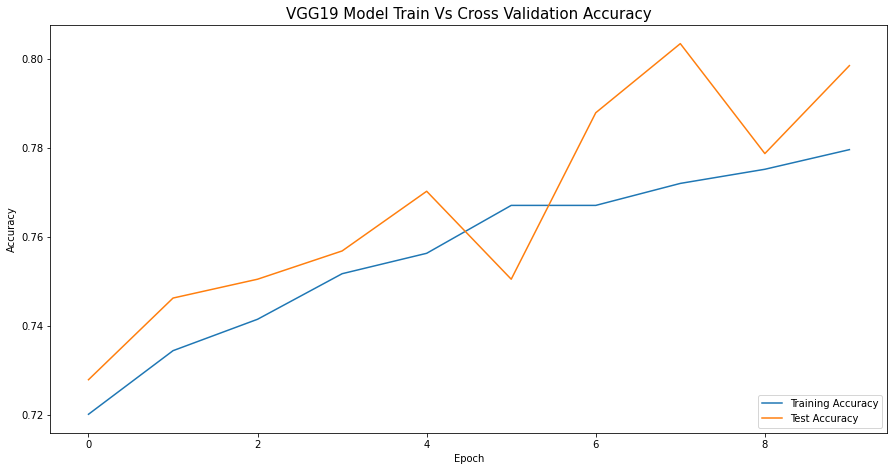

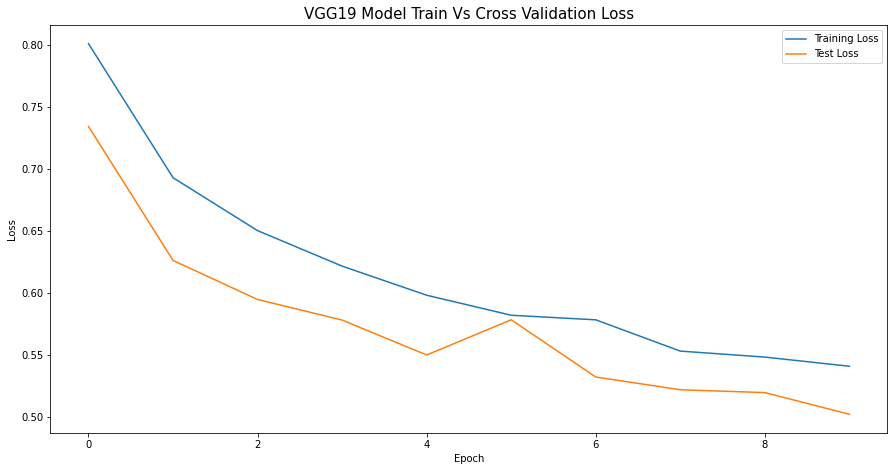

In [110]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_Loss_plot.jpg")
plt.show()


In [111]:
## AveragePooling2D layer size (4, 4) and dropout rate 0.1 
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (4, 4))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [112]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [113]:
final_model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [114]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights_modified.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [115]:
final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv), 
                callbacks = checkpoint, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 21s 234ms/step - loss: 0.8137 - accuracy: 0.7172 - val_loss: 0.7015 - val_accuracy: 0.7287A: 1s - loss: 0.8
Epoch 2/10
89/89 [==============================] - 21s 238ms/step - loss: 0.7007 - accuracy: 0.7370 - val_loss: 0.6369 - val_accuracy: 0.7456
Epoch 3/10
89/89 [==============================] - 21s 235ms/step - loss: 0.6520 - accuracy: 0.7500 - val_loss: 0.6101 - val_accuracy: 0.7519
Epoch 4/10
89/89 [==============================] - 21s 236ms/step - loss: 0.6306 - accuracy: 0.7518 - val_loss: 0.6135 - val_accuracy: 0.7689
Epoch 5/10
89/89 [==============================] - 21s 240ms/step - loss: 0.6113 - accuracy: 0.7541 - val_loss: 0.5735 - val_accuracy: 0.7674
Epoch 6/10
89/89 [==============================] - 21s 240ms/step - loss: 0.5914 - accuracy: 0.7636 - val_loss: 0.5522 - val_accuracy: 0.7886
Epoch 7/10
89/89 [==============================] - 22s 246ms/step - loss: 0.5838 - accuracy: 0.7678 - val_loss: 0.5628 - val

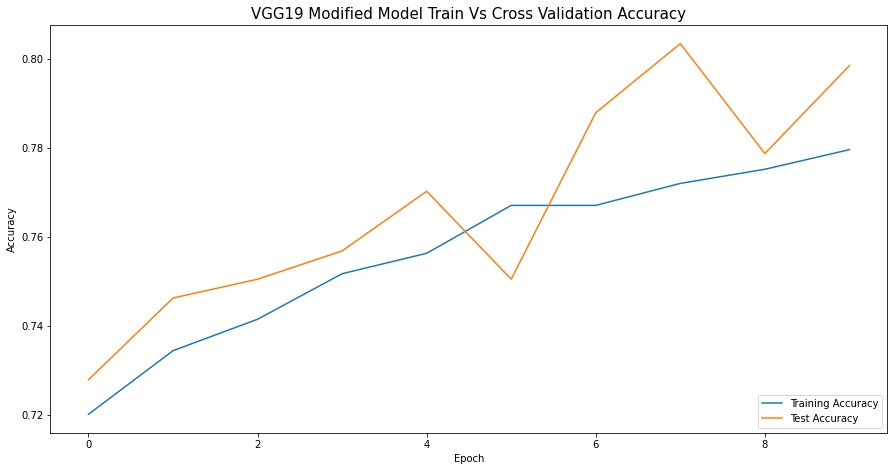

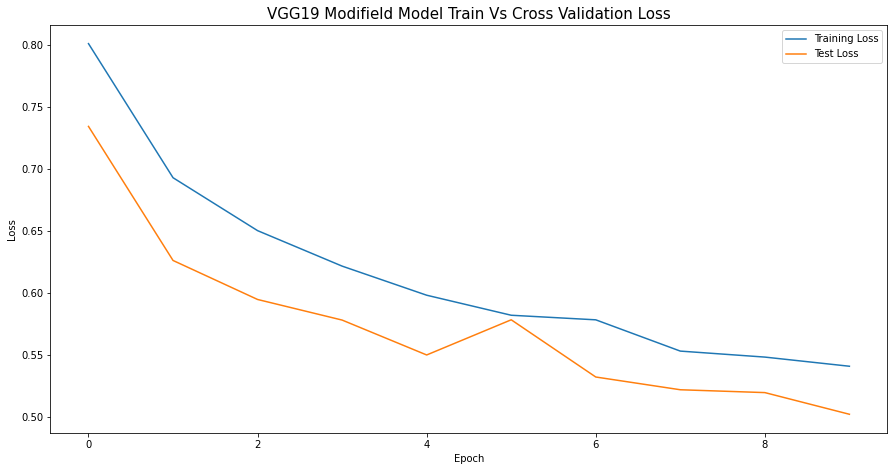

In [116]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Modified Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_modified_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Modifield Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_modified_Loss_plot.jpg")
plt.show()


In [117]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [01:06<00:00, 107.19it/s]


In [125]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [126]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [127]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [128]:
images.shape

(7095, 299, 299, 3)

In [129]:
headmodel = Xception(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [130]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [131]:
final_model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [132]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "Xception_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [133]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               callbacks = checkpoint, epochs = 10, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 31s 343ms/step - loss: 0.6175 - accuracy: 0.7828 - val_loss: 0.4104 - val_accuracy: 0.8210
Epoch 2/10
89/89 [==============================] - 29s 320ms/step - loss: 0.3790 - accuracy: 0.8483 - val_loss: 0.4467 - val_accuracy: 0.8337
Epoch 3/10
89/89 [==============================] - 30s 333ms/step - loss: 0.3336 - accuracy: 0.8643 - val_loss: 0.3854 - val_accuracy: 0.8379
Epoch 4/10
89/89 [==============================] - 32s 358ms/step - loss: 0.3133 - accuracy: 0.8730 - val_loss: 0.3853 - val_accuracy: 0.8337
Epoch 5/10
89/89 [==============================] - 30s 335ms/step - loss: 0.2777 - accuracy: 0.8825 - val_loss: 0.3964 - val_accuracy: 0.8302
Epoch 6/10
89/89 [==============================] - 31s 353ms/step - loss: 0.2637 - accuracy: 0.8885 - val_loss: 0.4229 - val_accuracy: 0.8154
Epoch 7/10
89/89 [==============================] - 33s 368ms/step - loss: 0.2479 - accuracy: 0.8971 - val_loss: 0.3992 - val_accuracy: 0.8273

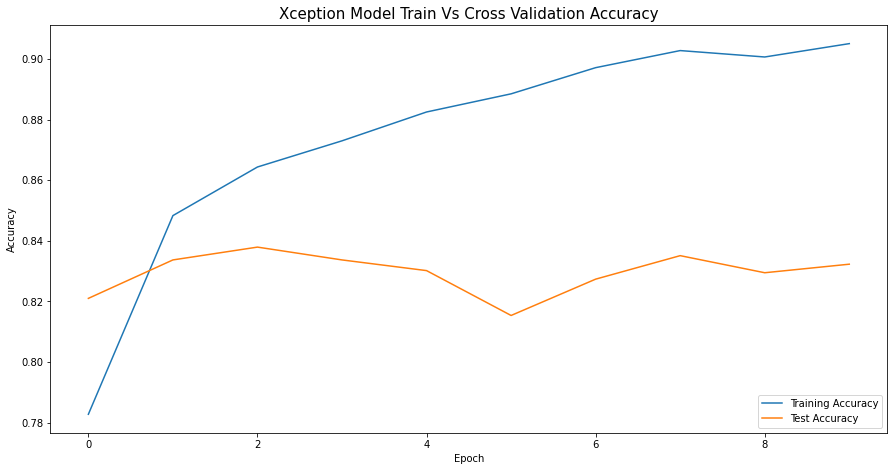

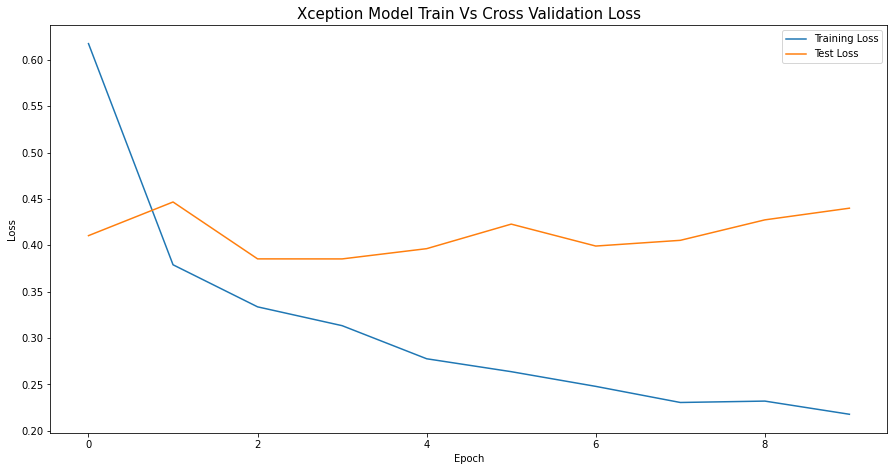

In [134]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('Xception Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/Xception_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('Xception Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/Xception_Loss_plot.jpg")
plt.show()


In [135]:
headmodel = InceptionV3(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dense(256, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [136]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [137]:
final_model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_106 (Conv2D)             (None, 149, 149, 32) 864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_106 (BatchN (None, 149, 149, 32) 96          conv2d_106[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_106[0][0]    
______________________________________________________________________________________

In [138]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "InceptionV3_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [139]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 10, batch_size = 64, callbacks = checkpoint)

Epoch 1/10
89/89 [==============================] - 18s 207ms/step - loss: 0.6183 - accuracy: 0.7548 - val_loss: 0.4978 - val_accuracy: 0.7879
Epoch 2/10
89/89 [==============================] - 19s 216ms/step - loss: 0.4398 - accuracy: 0.8122 - val_loss: 0.4227 - val_accuracy: 0.8280
Epoch 3/10
89/89 [==============================] - 18s 206ms/step - loss: 0.4036 - accuracy: 0.8265 - val_loss: 0.4064 - val_accuracy: 0.8379
Epoch 4/10
89/89 [==============================] - 18s 205ms/step - loss: 0.3606 - accuracy: 0.8499 - val_loss: 0.4109 - val_accuracy: 0.8309
Epoch 5/10
89/89 [==============================] - 20s 221ms/step - loss: 0.3281 - accuracy: 0.8622 - val_loss: 0.4285 - val_accuracy: 0.8273
Epoch 6/10
89/89 [==============================] - 19s 211ms/step - loss: 0.3192 - accuracy: 0.8622 - val_loss: 0.4125 - val_accuracy: 0.8280
Epoch 7/10
89/89 [==============================] - 19s 208ms/step - loss: 0.2988 - accuracy: 0.8751 - val_loss: 0.4240 - val_accuracy: 0.8196

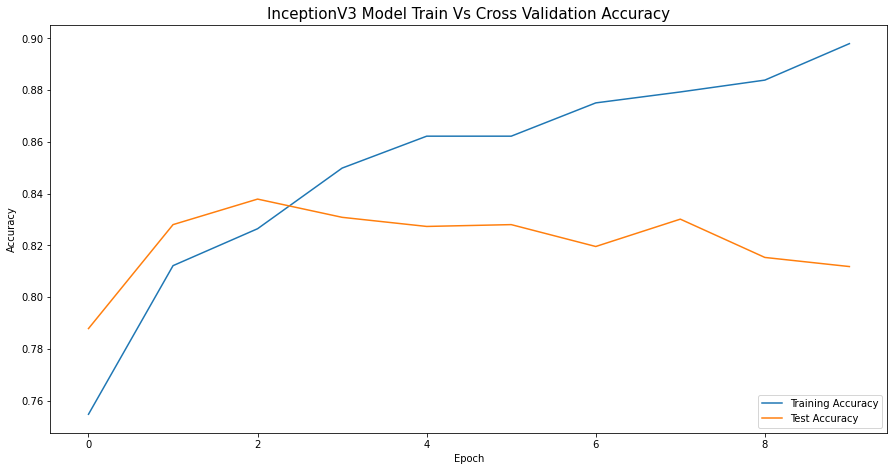

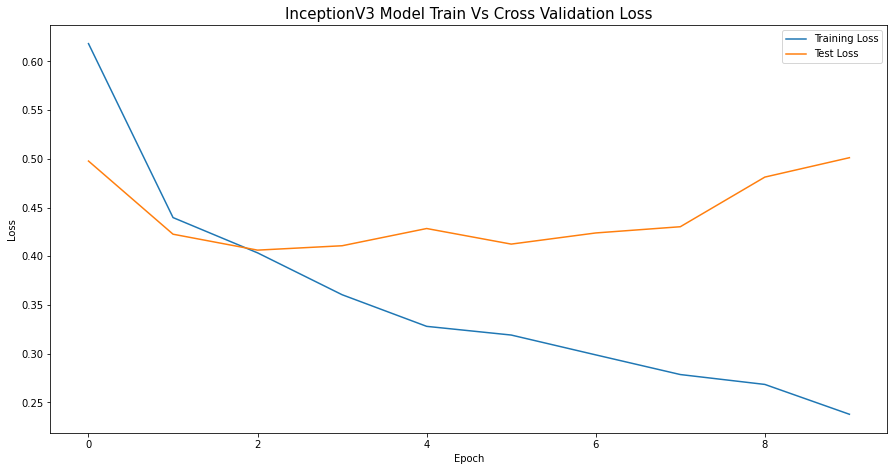

In [140]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('InceptionV3 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/InceptionV3_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('InceptionV3 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/InceptionV3_Loss_plot.jpg")
plt.show()


In [141]:
from tensorflow.keras.applications import EfficientNetB4

In [147]:
headmodel = EfficientNetB4(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (380, 380, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dense(256, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [148]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [149]:
final_model.summary()

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 380, 380, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 380, 380, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 380, 380, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 381, 381, 3)  0           normalization_1[0][0]            
______________________________________________________________________________________

In [150]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (380, 380))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [01:05<00:00, 108.40it/s]


In [151]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

MemoryError: Unable to allocate 11.4 GiB for an array with shape (7095, 380, 380, 3) and data type float32

In [ ]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [145]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "EfficientNetB4_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [146]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 10, batch_size = 64, callbacks = checkpoint)

Epoch 1/10
89/89 [==============================] - 43s 480ms/step - loss: 0.9675 - accuracy: 0.7132 - val_loss: 0.8795 - val_accuracy: 0.7259
Epoch 2/10
89/89 [==============================] - 41s 457ms/step - loss: 0.8773 - accuracy: 0.7259 - val_loss: 0.8584 - val_accuracy: 0.7259
Epoch 3/10
89/89 [==============================] - 42s 474ms/step - loss: 0.8690 - accuracy: 0.7259 - val_loss: 0.8584 - val_accuracy: 0.7259
Epoch 4/10
49/89 [===============>..............] - ETA: 14s - loss: 0.8464 - accuracy: 0.7347

KeyboardInterrupt: 

In [ ]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('EfficientNetB4 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/EfficientNetB4_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('EfficientNetB4 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/EfficientB4_Loss_plot.jpg")
plt.show()
